<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/FSRCNN_PyTesseract_cc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (5,135 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [4]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.7 MB/s eta 0:00:00


In [5]:
import cv2
from cv2 import dnn_superres
import pytesseract
import matplotlib.pyplot as plt

In [6]:
#check the version of cv2, it should be higher than 4.3
print(cv2.__version__)

4.7.0


In [7]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

Cloning into 'OCR_for_Bank_Statement'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 70 (delta 19), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (70/70), 10.03 MiB | 8.60 MiB/s, done.


In [11]:
def up_resolution(img_path, model_path):
  # Create an SR object
  sr = dnn_superres.DnnSuperResImpl_create()
  # Read image
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
  # Read the desired model 
  sr.readModel(model_path)
  # Set the desired model and scale to get correct pre- and post-processing
  sr.setModel("edsr", 3)
  # Upscale the image
  result = sr.upsample(image)
  # Save the image
  cv2.imwrite("./upscaled.png", result)

In [14]:
model_path = "OCR_for_Bank_Statement/FSRCNN_x2.pb"
img_path = "OCR_for_Bank_Statement/Dataset2/cc1.png"

In [15]:
up_resolution(img_path, model_path)

In [17]:
#convert image to string
img_cc1 = cv2.imread('upscaled.png')

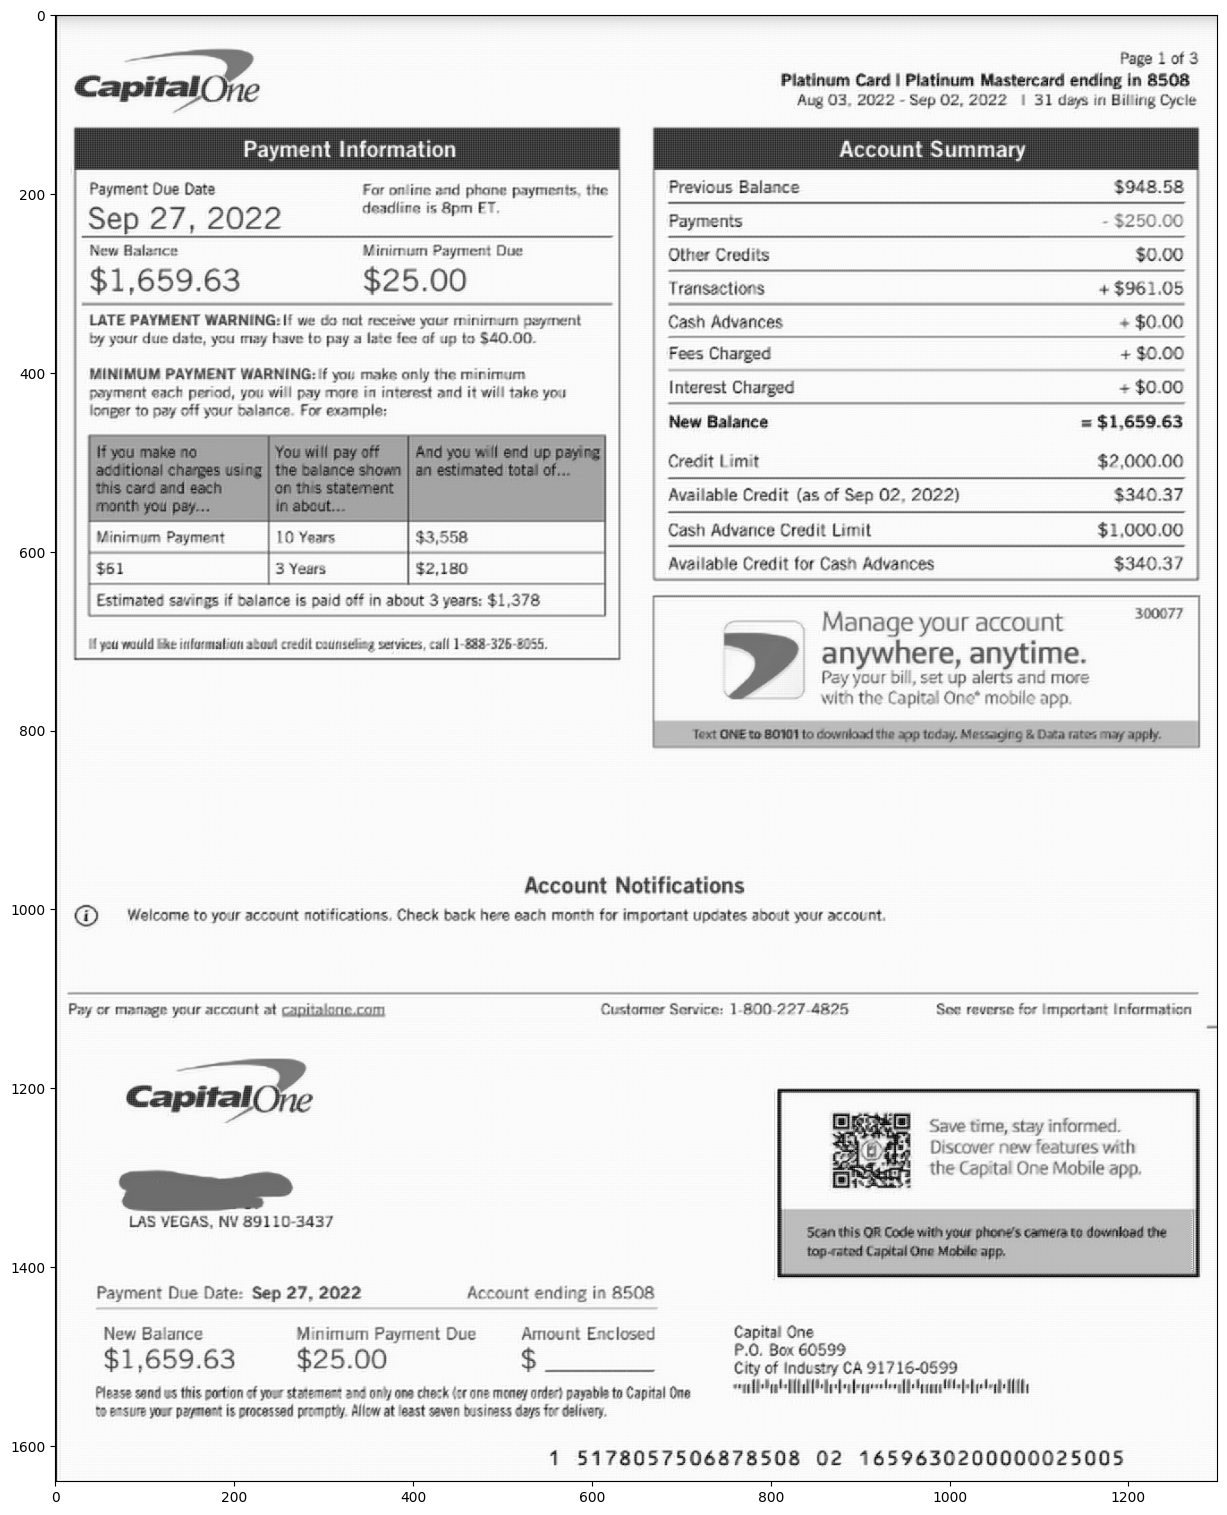

In [18]:
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(img_cc1)

In [19]:
#Extract the text using pytesseract
cc1_text = pytesseract.image_to_string(img_cc1)

In [20]:
print(cc1_text)

 

 

 

Page 1 of 3

Platinum Card | Platinum Mastercard ending In 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

Account Summary

 

 

LATE PAYMENT WARNING: If we do nat receive yaur rinirnum payment
by your due date, you may have to pay a late fee af up to $40.00.

AINIMUM PAYMENT WARNING: If you make only the minimum
payment each period, you will pay more in interest and it will take you
longer to pay off your balance. For example:

 

Minimum Payment 10 Years $3,558

 

| $61 3 Years $2,180

 

 

| Estimated savings if balance is paid off in about 3 years: $1,378

 

 

Payment Oue Date Far online ad phane payments, the Previous Balance $948.58
Sep 27, 2022 ee Payments - $250.00
New Balaace Minimum Payment Due Other Credits $0.00
$1,659.63 $25.00 Transactions + $961.05

Cash Advances

+ $0.00

 

Fees Charged
Interest Charged

+ $0.00
+ $0.00

 

New Balance

Credit Limit

= $1,659.63
$2,000.00

 

Available Credit (as of Sep 02, 2022)

$340.37

 

Cash Advarice Cr

In [23]:
#Check the levenshtein distance
from Levenshtein import distance

ground_value = ''' 

 

 

Page 1 of 3

Platinum Card | Platinum Mastercard ending In 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

Account Summary

 

 

LATE PAYMENT WARNING: If we do not receive your rinirnum payment
by your due date, you may have to pay a late fee af up to $40.00.

MINIMUM PAYMENT WARNING: If you make only the minimum
payment each period, you will pay more in interest and it will take you
longer to pay off your balance. For example:

 

Minimum Payment 10 Years $3,558

 

| $61 3 Years $2,180

 

 

| Estimated savings if balance is paid off in about 3 years: $1,378

 

 

Payment Due Date For online and phone payments, the Previous Balance $948.58
Sep 27, 2022 deadline is 8pm ET. Payments - $250.00
New Balaace Minimum Payment Due Other Credits $0.00
$1,659.63 $25.00 Transactions + $961.05

Cash Advances

+ $0.00

 

Fees Charged
Interest Charged

+ $0.00
+ $0.00

 

New Balance

Credit Limit

= $1,659.63
$2,000.00

 

Available Credit (as of Sep 02, 2022)

$340.37

 

Cash Advance Credit Limit

$1,000.00

 

Available Credit for Cash Advances

$340.37

 

 

 

 

Mf you would Eke information about credit courseling services, call 1-888-326-8055.

 

 

Manage your account

300077

2 anywhere, anytime.
Pay your bill, set up alerts and more

with the Capital One* mobile app.

“Text ONE to 80101 to download the agp today. Messaging & Data rates may apply.

Account Notifications
@® __ Welcome to your account notifications. Check back here each month for important updates about your account.

 

 

Pay or manage your account at capitalone.com Custamer Service: 1-800-227-4825



LAS VEGAS, NV 89110-3437

Payment Due Date: Sep 27, 2022 Account ending in 8508
New Balance Minimum Payment Due Amount Enclosed
$1,659.63 $25.00 $

Please send us this portion of your statement and only one check (or one meney order) payable to Capital One

to Ensure your payment is processed promptly. Allow at least seven businass days for delivery.

See reverse for Important Infarmation

Save time, stay informed.
Discover new features with
the Capital One Mobile app.

 

Capital One

P.O. Box 60599

City of Industry CA 91716-0599

col atta te valletroec! ble atl

 

Scan this OR Code with your phone's camera to download the

 

1 5178057506878508 02 1659630200000025005
'''


print(distance(ground_value, cc1_text))

46


In [24]:
#check the accuracy using sequence matcher
from difflib import SequenceMatcher

sm = SequenceMatcher(None, cc1_text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.93
